### Import Library

In [1]:
import pandas as pd# data processing
import numpy as np # linear algebra
import warnings# warning filter
import scipy as sp #pivot egineering


#ML model
from sklearn.metrics.pairwise import cosine_similarity
#default theme and settings
pd.options.display.max_columns

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")


### Import Dataset

In [2]:
dataset_anime = pd.read_csv('D:\\Jenny\\Big-Data Sem6\\andidewa-animee\\anime.csv')
dataset_rating = pd.read_csv('D:\\Jenny\\Big-Data Sem6\\andidewa-animee\\rating.csv')

#### Printing the dataset

In [3]:
dataset_anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [4]:
dataset_rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


#### Printing out the first five rows

In [5]:
dataset_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
dataset_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


#### Printing out the last five rows

In [7]:
dataset_anime.tail()

,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [8]:
dataset_rating.tail()

,user_id,anime_id,rating
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9
7813736,73516,8074,9


#### Printing out the shape of the dataset

In [9]:
dataset_anime.shape

(12294, 7)

In [10]:
dataset_rating.shape

(7813737, 3)

The dataset_anime has about 12294 rows and 7 columns respectively. Whereas, the dataset_rating has about 7813737 rows and 3 columns respectively

#### Checking out the number of null values and datatypes of each columns

In [11]:
dataset_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [12]:
dataset_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


As we can observe that there are some missing values in the column genre, type and rating

#### Checking out the sum of missing values in each columns

In [13]:
dataset_anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [14]:
dataset_rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

As we can observe there are 62 missing values in genre, 25 in type and 230 in rating.Also, in the rating.csv file there are no missing values

####  Handling the missing values in the column genre,rating and type

In [15]:
print(dataset_anime['type'].mode())
print(dataset_anime['genre'].mode())

0    TV
dtype: object
0    Hentai
dtype: object


In [16]:
# deleting anime with 0 rating
dataset_anime = dataset_anime[~np.isnan(dataset_anime["rating"])]

# filling mode value for type and genre
dataset_anime['type'] = dataset_anime['type'].fillna(
dataset_anime['type'].dropna().mode().values[0])

dataset_anime['genre'] = dataset_anime['genre'].fillna(
dataset_anime['genre'].dropna().mode().values[0])

In [17]:
#checking if all null values are filled
dataset_anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

#### checking the distribution of rating, as rating should be from 1 to 10 but -1 is also given which looks doubtful

In [18]:
dataset_rating.rating.value_counts()

 8     1646019
-1     1476496
 7     1375287
 9     1254096
 10     955715
 6      637775
 5      282806
 4      104291
 3       41453
 2       23150
 1       16649
Name: rating, dtype: int64

#### Since, rating should be from 1 to 10 and -1 might be respresenting no rating available. Therefore, we will fill -1 rows with Nan values

#### Filling Nan Values

In [19]:
dataset_rating['rating'] = dataset_rating['rating'].apply(lambda x: np.nan if x==-1 else x)
dataset_rating.head(20)

,user_id,anime_id,rating
0,1,20,NaN
1,1,24,NaN
2,1,79,NaN
3,1,226,NaN
4,1,241,NaN
5,1,355,NaN
6,1,356,NaN
7,1,442,NaN
8,1,487,NaN
9,1,846,NaN


#### Recommending anime series only when the relevant type is TV

In [20]:
dataset_anime = dataset_anime[dataset_anime['type']=='TV']

#### Now we will make new dataframe combining both anime and rating on the anime_id column

In [21]:
anime_rated= dataset_rating .merge(dataset_anime, left_on = 'anime_id', right_on = 'anime_id', suffixes= ['_user', ''])

#### defining the columns for anime_rated which are user_id, name and rating

In [22]:
anime_rated =anime_rated[['user_id', 'name', 'rating']]

#### Using only first 8500 users  

In [23]:
anime_rated_8500= anime_rated[anime_rated.user_id <= 8500]
anime_rated_8500.head()

,user_id,name,rating
0,1,Naruto,7.81
1,3,Naruto,7.81
2,5,Naruto,7.81
3,6,Naruto,7.81
4,10,Naruto,7.81


#### Pivot Table for similarity  

Pivot table is made as it helps in analyzing the calculation of similarity.
Here, we are creating a pivot table of tv show names as columns and users as rows

In [24]:
pivot = anime_rated.pivot_table(index=['user_id'], columns=['name'], values='rating')
pivot.head()

name,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,0-sen Hayato,009-1,07-Ghost,11eyes,12-sai.: Chicchana Mune no Tokimeki,12-sai.: Chicchana Mune no Tokimeki 2nd Season,2020 Nyeon Ujuui Wonder Kiddy,...,Zukkoke Knight: Don De La Mancha,Zumomo to Nupepe,ef: A Tale of Melodies.,ef: A Tale of Memories.,gdgd Fairies,gdgd Fairies 2,iDOLM@STER Xenoglossia,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,6.49,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.11,NaN


#### Normalizing value

In [25]:
pivot_n = pivot.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)

#### Filling 0 to Nan values

In [26]:
pivot_n.fillna(0, inplace=True)

#### Transposing the pivot

In [27]:
pivot_n = pivot_n.T

#### Dropping the columns with values of 0 

In [28]:
pivot_n = pivot_n.loc[:, (pivot_n != 0).any(axis=0)]

#### Using scipy package to convert to sparse matrix format for the similarity computation.

In [29]:
piv_sparse = sp.sparse.csr_matrix(pivot_n.values)

## Cosine Similarity

In [30]:
#model based on anime similarity
anime_similarity = cosine_similarity(piv_sparse)

#Df of anime similarities
ani_sim_df = pd.DataFrame(anime_similarity, index = pivot_n.index, columns = pivot_n.index)

In [31]:
def anime_recommendation(ani_name):
    """
    This function will return the top 5 shows with the highest cosine similarity value and show match percent
    
    example:
    >>>Input: 
    
    anime_recommendation('Death Note')
    
    >>>Output: 
    
    Recommended because you watched Death Note:

                    #1: Code Geass: Hangyaku no Lelouch, 57.35% match
                    #2: Code Geass: Hangyaku no Lelouch R2, 54.81% match
                    #3: Fullmetal Alchemist, 51.07% match
                    #4: Shingeki no Kyojin, 48.68% match
                    #5: Fullmetal Alchemist: Brotherhood, 45.99% match 

               
    """
    
    number = 1
    print('Recommended because you watched {}:\n'.format(ani_name))
    for anime in ani_sim_df.sort_values(by = ani_name, ascending = False).index[1:6]:
        print(f'#{number}: {anime}, {round(ani_sim_df[anime][ani_name]*100,2)}% match')
        number +=1  
     
    

In [32]:
anime_recommendation('Naruto')

Recommended because you watched Naruto:

#1: Sword Art Online, 28.57% match
#2: Bleach, 25.64% match
#3: Elfen Lied, 24.92% match
#4: Ao no Exorcist, 24.68% match
#5: Akame ga Kill!, 21.4% match


## Collaborative Recommendation System

In [33]:
anime_rated.head()

,user_id,name,rating
0,1,Naruto,7.81
1,3,Naruto,7.81
2,5,Naruto,7.81
3,6,Naruto,7.81
4,10,Naruto,7.81


In [34]:
# Count the number of ratings for each anime
count_rating = anime_rated.groupby("name")["rating"].count().sort_values(ascending = False)
count_rating

name
Death Note                         39340
Sword Art Online                   30583
Shingeki no Kyojin                 29584
Code Geass: Hangyaku no Lelouch    27718
Elfen Lied                         27506
                                   ...  
Otogi Manga Calendar                   1
Neko no Dayan: Nihon e Iku             1
Bakuhatsu Gorou                        1
Bakujuu Gasshin Ziguru Hazeru          1
Asobo Toy-chan                         1
Name: rating, Length: 3402, dtype: int64

In [35]:
# Some animes have only 1 rating, therefore it is better for the recommender system to ignore them
# We will keep only the animes with at least r ratings
r = 5000
more_than_r_ratings = count_rating[count_rating.apply(lambda x: x >= r)].index

# Keep only the animes with at least r ratings in the DataFrame
df_r = anime_rated[anime_rated['name'].apply(lambda x: x in more_than_r_ratings)]

In [36]:
before = len(anime_rated.name.unique())
after = len(df_r.name.unique())
rows_before = anime_rated.shape[0]
rows_after = df_r.shape[0]
print(f'''There are {before} animes in the dataset before filtering and {after} animes after the filtering.

{before} animes => {after} animes
{rows_before} rows before filtering => {rows_after} rows after filtering''')

There are 3402 animes in the dataset before filtering and 303 animes after the filtering.

3402 animes => 303 animes
5283596 rows before filtering => 2972542 rows after filtering


In [37]:
# Create a matrix with userId as rows and the titles of the movies as column.
# Each cell will have the rating given by the user to the animes.
# There will be a lot of NaN values, because each user hasn't watched most of the animes
df_recom = df_r.pivot_table(index='user_id',columns='name',values='rating')
df_recom.iloc[:5,:5]

name,11eyes,Accel World,Afro Samurai,Air,Air Gear
user_id,,,,,
1,6.49,7.62,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,7.62,7.41,NaN,NaN
4,NaN,NaN,7.41,NaN,7.69
5,NaN,7.62,NaN,NaN,NaN


In [38]:
df_r.name.value_counts().head()

Death Note                         39340
Sword Art Online                   30583
Shingeki no Kyojin                 29584
Code Geass: Hangyaku no Lelouch    27718
Elfen Lied                         27506
Name: name, dtype: int64

In [39]:
def find_corr(anime_rated, name):
    '''
    Get the correlation of one anime with the others
    
    Args
        df (DataFrame):  with user_id as rows and movie titles as column and ratings as values
        name (str): Name of the anime
    
    Return
        DataFrame with the correlation of the anime with all others
    '''
    
    similar_to_movie = anime_rated.corrwith(anime_rated[name])
    similar_to_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    similar_to_movie = similar_to_movie.sort_values(by = 'Correlation', ascending = False)
    return similar_to_movie

## Recommendation

In [40]:
# Let's choose an anime
anime1 = 'Fairy Tail'

# Let's try with "Fairy Tail"

# Recommendations
find_corr(df_recom, anime1).head(40)

,Correlation
name,
Ore no Imouto ga Konnani Kawaii Wake ga Nai,1.0
Gantz,1.0
Dragon Ball GT,1.0
Tokyo Ghoul √A,1.0
Tenjou Tenge,1.0
Cowboy Bebop,1.0
Code Geass: Hangyaku no Lelouch,1.0
Kamisama Hajimemashita,1.0
Clannad,1.0


In [41]:
# Not recommended
find_corr(df_recom, anime1).tail(40)

,Correlation
name,
Shijou Saikyou no Deshi Kenichi,NaN
Shiki,NaN
Shingeki no Kyojin,NaN
Shokugeki no Souma,NaN
Shuffle!,NaN
Skip Beat!,NaN
Sora no Otoshimono: Forte,NaN
Soul Eater,NaN
Special A,NaN


In [42]:
# Let's choose an anime
anime2 = 'Bleach'

# Let's try with "Fairy Tail"

# Recommendations
find_corr(df_recom, anime2).head(40)

,Correlation
name,
11eyes,1.0
Lovely★Complex,1.0
Kiseijuu: Sei no Kakuritsu,1.0
Kill la Kill,1.0
Katekyo Hitman Reborn!,1.0
Kanon (2006),1.0
Kami nomi zo Shiru Sekai II,1.0
Accel World,1.0
K,1.0


In [43]:
# both dataset has a common column called the anime_is joining them
data_merge = pd.merge (dataset_anime, dataset_rating, on = 'anime_id')

In [44]:
data_merge.shape

(5283596, 9)

In [45]:
data_merge= data_merge[data_merge.rating_y != -1]
data_merge.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10.0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,10,10.0
2,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,11,8.0
3,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,12,9.0
4,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,17,10.0


In [68]:
sample = data_merge.sample(n=83596)
sample.shape #below I conduct SVD and it cannot handle anything larger than 5000 (i've tried)

(83596, 9)

In [69]:
sample.dtypes #rating_x needs to be an int, for it to work in ALS

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating_x    float64
members       int64
user_id       int64
rating_y    float64
dtype: object

In [70]:
sample['rating_x'] = sample['rating_x'].astype(int)

In [71]:
sample.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating_x      int32
members       int64
user_id       int64
rating_y    float64
dtype: object

In [72]:
#we are going to look at how many times each rating appears in a columnratings_x = sample['rating_x'].value_counts() #continuous
ratings_y = sample['rating_y'].value_counts() #discreteprint(ratings_x)
print(ratings_y)

8.0     18143
9.0     14629
7.0     14487
10.0    10923
6.0      6177
5.0      2719
4.0      1026
3.0       392
2.0       189
1.0       120
Name: rating_y, dtype: int64


In [73]:
sample.rating_x = sample.rating_x.apply(round) 
sample.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
5104793,22537,Yami Shibai 2nd Season,"Dementia, Horror, Supernatural",TV,13,6,17379,39649,6.0
322300,31043,Boku dake ga Inai Machi,"Mystery, Psychological, Seinen, Supernatural",TV,12,8,402381,47767,7.0
898353,18195,Little Busters!: Refrain,"Comedy, Drama, Romance, School, Slice of Life,...",TV,13,8,71820,72107,9.0
4971859,225,Dragon Ball GT,"Action, Adventure, Comedy, Fantasy, Magic, Sci...",TV,64,6,226625,40739,NaN
1758242,15809,Hataraku Maou-sama!,"Comedy, Demons, Fantasy, Romance, Shounen",TV,13,8,409037,41673,8.0


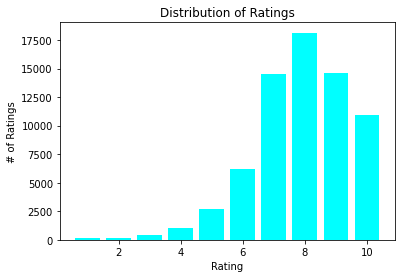

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# plot distribution in matplotlib
ratings_sorted = sorted(list(zip(ratings_y.index, ratings_y)))
plt.bar([r[0] for r in ratings_sorted], [r[1] for r in ratings_sorted], color='cyan')
plt.xlabel("Rating")
plt.ylabel("# of Ratings")
plt.title("Distribution of Ratings")
plt.show()

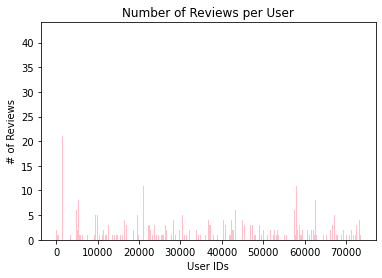

In [75]:
ratings_per_user = sample['user_id'].value_counts()
ratings_per_user = sorted(list(zip(ratings_per_user.index, ratings_per_user)))
plt.bar([r[0] for r in ratings_per_user], [r[1] for r in ratings_per_user], color='pink')
plt.xlabel('User IDs')
plt.ylabel('# of Reviews')
plt.title('Number of Reviews per User')
plt.show()